<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Jornada 6</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Introducción a Ecuaciones Diferenciales en Derivadas Parciales
    </p>
</div>


En esta jornada, comenzaremos estudiando campos escalares y vectoriales y algunas propiedades.

Comencemos con el campo escalar $T : \mathbb{R}^2 \rightarrow \mathbb{R}$

$$
T(x, y) = e^{-(x^2 + y^2)}
$$

Esta función de dos variables independientes asigna a cada punto del espacio $(x, y)$ un valor numérico $T$.


Una forma común de representar estas funciones es mediante un mapa de calor (o heatmap), donde los valores de $T$ se muestran con diferentes colores. En el caso específico del mapa de colores `hot` de `matplotlib`, los colores van desde tonos oscuros (negro) para los valores más bajos de $T$, pasando por tonos rojos y naranjas, hasta alcanzar tonos amarillos y blancos para los valores más altos. Este tipo de representación visual resalta las áreas de alta y baja intensidad del campo escalar, permitiéndonos identificar fácilmente regiones donde $T$ cambia rápidamente y observar patrones generales en los datos.

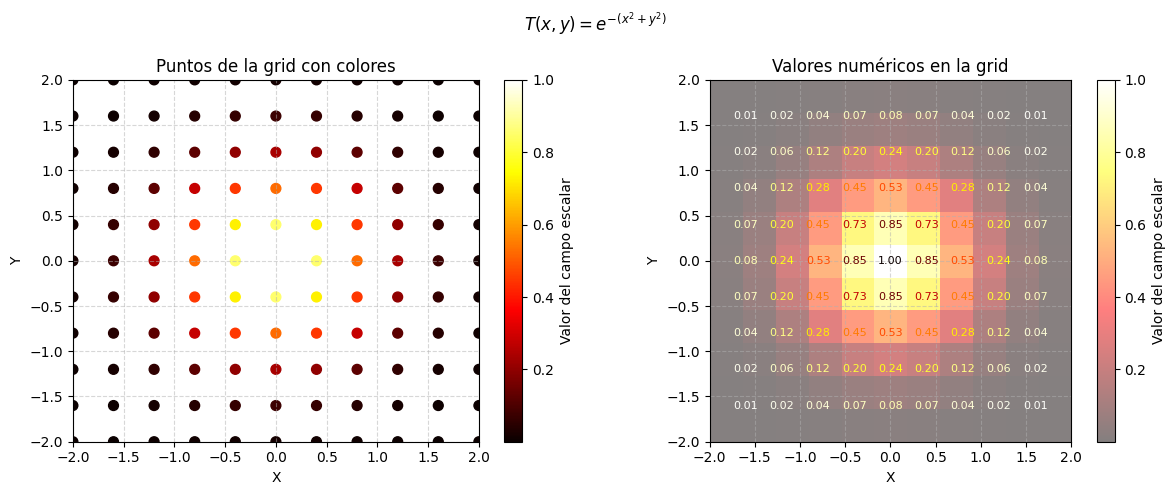

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos un campo escalar
def scalar_field(x, y):
    return np.exp(-(x**2 + y**2))

# Crear un grid menos denso
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(x, y)
T = scalar_field(X, Y)

# Graficar el campo escalar
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primer subplot: Representación con puntos de colores
sc = axs[0].scatter(X, Y, c=T, cmap="hot", s=50)
cbar0 = fig.colorbar(sc, ax=axs[0])
cbar0.set_label("Valor del campo escalar")
axs[0].set_title("Puntos de la grid con colores")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].grid(ls="--", alpha=0.5)

axs[0].set_xlim(-2,2)
axs[0].set_ylim(-2,2)

# Segundo subplot: Representación con números y colores en hot_r
for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        # Cambiar el color al mapa de colores invertido
        axs[1].text(X[i, j], Y[i, j], f"{T[i, j]:.2f}", color=plt.cm.hot_r(T[i, j]),
                    ha="center", va="center", fontsize=8)

im = axs[1].imshow(T, cmap="hot", extent=[-2, 2, -2, 2], origin="lower", alpha=0.5)
cbar1 = fig.colorbar(im, ax=axs[1])
cbar1.set_label("Valor del campo escalar")
axs[1].set_title("Valores numéricos en la grid")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].grid(ls="--", alpha=0.5)

fig.suptitle(r"$T(x, y) = e^{-(x^2+y^2)}$")

plt.tight_layout()
plt.show()


En matplotlib, disponemos de las herramientas `plt.contour`, `plt.contourf` y `plt.pcolormesh` para representar campos escalares:

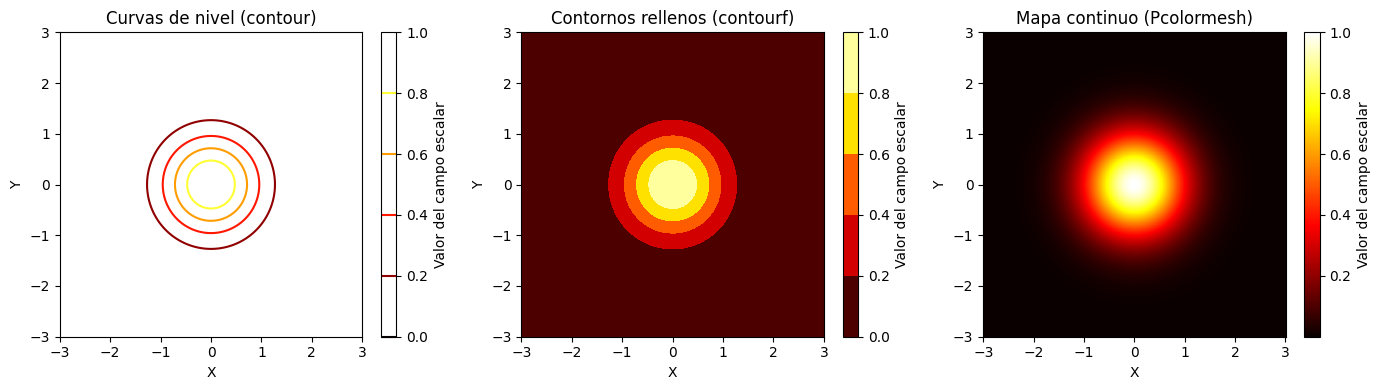

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos un campo escalar
def scalar_field(x, y):
    return np.exp(-(x**2 + y**2))

# Crear un grid
x = np.linspace(-3, 3, 1001)
y = np.linspace(-3, 3, 1001)
X, Y = np.meshgrid(x, y)
T = scalar_field(X, Y)

# Graficar el campo escalar
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Mapa de contornos (curvas de nivel)
contour = axs[0].contour(X, Y, T, cmap="hot", levels=5)
cbar0 = fig.colorbar(contour, ax=axs[0])
cbar0.set_label("Valor del campo escalar")
axs[0].set_title("Curvas de nivel (contour)")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# Mapa de contornos rellenos
contourf = axs[1].contourf(X, Y, T, cmap="hot", levels=5)
cbar1 = fig.colorbar(contourf, ax=axs[1])
cbar1.set_label("Valor del campo escalar")
axs[1].set_title("Contornos rellenos (contourf)")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

# Imagen en 2D (imshow)
im = axs[2].pcolormesh(X, Y, T, cmap="hot")
cbar2 = fig.colorbar(im, ax=axs[2])
cbar2.set_label("Valor del campo escalar")
axs[2].set_title("Mapa continuo (Pcolormesh)")
axs[2].set_xlabel("X")
axs[2].set_ylabel("Y")

plt.tight_layout()
plt.show()


Además, es útil analizar el **gradiente** del campo escalar $T$, denotado por $\vec{\nabla} T$, que se define como:

$$
\vec{\nabla} T = \left( \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right)
$$

El gradiente proporciona la dirección y la magnitud de la mayor tasa de cambio de $T$ en cada punto del espacio. En el caso de la función

$$T(x, y) = e^{-(x^2 + y^2)}$$

las flechas del gradiente apuntan hacia adentro, hacia el origen, indicando que el valor de $T$ aumenta más rápidamente a medida que uno se acerca al centro.

En términos físicos, esta función puede modelar una distribución de temperatura que se disipa simétricamente a medida que te alejas del punto $(0, 0)$, donde la temperatura es máxima.


Calculemos el gradiente del campo escalar:

$$ \vec{\nabla} T(x, y) = \left( \frac{\partial T}{\partial x}, \frac{\partial T}{\partial y} \right) = \left( -2xe^{-(x^2+y^2)}, -2ye^{-(x^2+y^2)}\right) $$

Notar que el gradiente de un campo escalar, es un campo vectorial! Por lo tanto podemos representarlo mediante un mapa de flechas  `plt.quiver` y/o líneas de corriente `plt.streamplot`:


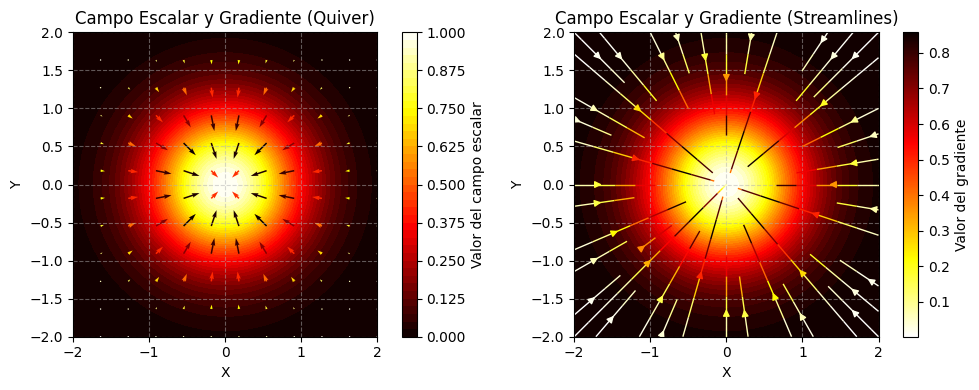

In [4]:
# Definimos el campo escalar y su gradiente
def scalar_field(x, y):
    return np.exp(-(x**2 + y**2))

def grad_f(x, y):
    dfdx = -2 * x * np.exp(-(x**2 + y**2))
    dfdy = -2 * y * np.exp(-(x**2 + y**2))
    return dfdx, dfdy

# Crear un grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
T = scalar_field(X, Y)
Tx, Ty = grad_f(X, Y)
T_mag = np.sqrt(Tx**2 + Ty**2)

# Graficar el campo escalar y el gradiente
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Primer subplot: Campo escalar con flechas del gradiente
cf0 = ax[0].contourf(X, Y, T, cmap="hot", levels=40)
ax[0].set_title("Campo Escalar y Gradiente (Quiver)")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].grid(ls="--", alpha=0.5)

# Graficar las flechas del gradiente
skip = 9 # Espaciado para mostrar menos flechas
qk = ax[0].quiver(
    X[::skip, ::skip],
    Y[::skip, ::skip],
    Tx[::skip, ::skip],
    Ty[::skip, ::skip],
    T_mag[::skip, ::skip],
    cmap="hot_r",
    scale=15
)

# Añadir la colorbar al primer subplot
fig.colorbar(cf0, ax=ax[0], label="Valor del campo escalar")

# Segundo subplot: Campo escalar con líneas de corriente
cf1 = ax[1].contourf(X, Y, T, cmap="hot", levels=40)
ax[1].set_title("Campo Escalar y Gradiente (Streamlines)")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].grid(ls="--", alpha=0.5)

# Graficar las líneas de corriente del gradiente
strm = ax[1].streamplot(X, Y, Tx, Ty, color=T_mag, cmap="hot_r", linewidth=1, density=0.5)

# Añadir la colorbar al segundo subplot
fig.colorbar(strm.lines, ax=ax[1], label="Valor del gradiente")

# Ajustar la distancia entre los subplots y las proporciones
plt.tight_layout()

for a in ax:
    a.axis("scaled")

plt.show()


El campo escalar $ T(x, y) = e^{-(x^2 + y^2)} $ satisface la siguiente ecuación diferencial parcial (EDP):

$$
\nabla^2 T + 4(x + y - 1)T = 0
$$

Donde el **Laplaciano** de un campo escalar $ T $ se define como:

$$
\nabla^2 T = \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}
$$

Si derivamos la expresión de $ T(x, y) = e^{-(x^2 + y^2)} $ y sustituimos en la ecuación anterior, podemos verificar que efectivamente es una solución de la EDP dada.

En este caso, disponemos de la forma analítica del campo $ T(x, y) $. Sin embargo, en física y en muchos otros campos de la ciencia, normalmente se dispone de la ecuación diferencial parcial en lugar del campo explícito, y nuestro objetivo es encontrar el campo $ T(x, y) $ que sea solución de la EDP, es decir, el proceso contrario.



<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

En este contexto, el objetivo de esta parte del curso es aprender a encontrar soluciones aproximadas de estas ecuaciones diferenciales parciales mediante métodos numéricos, como el método de **diferencias finitas**.

</div>

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Caso de estudio: Ecuación de Laplace para Placas Paralelas**

La ecuación de Laplace se puede derivar a partir de la Ley de Gauss para el campo eléctrico en regiones donde no existen cargas libres. La Ley de Gauss, expresada en su forma diferencial, es:

$$ \vec{\nabla} \cdot \vec{E} = \frac{\rho}{\epsilon_0} $$

donde:

- $\vec{E}$ es el campo eléctrico.
- $\rho$ es la densidad de carga en la región.
- $\epsilon_0$ es la permitividad del vacío.

Cuando no hay cargas libres en una región, es decir, $\rho = 0$, la ecuación se simplifica a:

$$ \vec{\nabla} \cdot \vec{E} = 0 $$

Ahora, usando la relación entre el campo eléctrico y el potencial eléctrico $\vec{E} = -\vec{\nabla} \phi$, donde $\phi$ es el potencial eléctrico, la ecuación anterior se convierte en:

$$ \vec{\nabla} \cdot (-\vec{\nabla} \phi) = 0 $$

Lo que nos lleva a la ecuación de Laplace para el potencial eléctrico:

$$ \nabla^2 \phi = 0 $$

**Aplicación en Física: Placas Paralelas en 2D**

<p align="center">
  <img src="potencial.png" width="40%">
</p>

Consideremos el caso de dos placas planas y paralelas separadas por una distancia $d$. Estas placas están sometidas a un potencial constante $V_0$ en una de ellas y $-V_0$ en la otra.

El potencial eléctrico entre las placas puede calcularse resolviendo la ecuación de Laplace bajo las condiciones de borde correspondientes a los potenciales aplicados en las placas:

- En una placa: $\phi(x_0 \leq x \leq x_0+L, y_0+d) = V_0$
- En la otra placa: $ \phi(x_0 \leq x \leq x_0+L, y_0) = -V_0$
</div>

#### **Discretización de la Ecuación de Laplace usando Diferencias Finitas**

La ecuación de Laplace en dos dimensiones se expresa como:

$$ \nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0 $$

Para resolverla numéricamente, usamos el método de **diferencias finitas**, que nos permite aproximar las segundas derivadas. Si dividimos la región en una malla de puntos con espaciado $\Delta x$ y $\Delta y$ en las direcciones $x$ e $y$, respectivamente, la ecuación de Laplace se puede discretizar como:

$$ \frac{\partial^2 \phi}{\partial x^2} \approx \frac{\phi_{i+1, j} - 2\phi_{i, j} + \phi_{i-1, j}}{\Delta x^2} $$

$$ \frac{\partial^2 \phi}{\partial y^2} \approx \frac{\phi_{i, j+1} - 2\phi_{i, j} + \phi_{i, j-1}}{\Delta y^2} $$

Sumando estas aproximaciones, obtenemos la forma discreta de la ecuación de Laplace:

$$ \frac{\phi_{i+1, j} - 2\phi_{i, j} + \phi_{i-1, j}}{\Delta x^2} + \frac{\phi_{i, j+1} - 2\phi_{i, j} + \phi_{i, j-1}}{\Delta y^2} = 0 $$

### Forma Simplificada

Si asumimos un espaciado uniforme, es decir, $\Delta x = \Delta y$, la ecuación se simplifica a:

$$ \phi_{i, j} = \frac{1}{4} \left( \phi_{i+1, j} + \phi_{i-1, j} + \phi_{i, j+1} + \phi_{i, j-1} \right) $$

Esto nos da una **relación de promedios**: el valor del potencial en cada punto es el promedio de los valores de sus vecinos inmediatos.

<p align="center">
  <img src="grid.png" width="40%">
</p>

### Método Iterativo: Relajación

Para resolver la ecuación de Laplace discretizada, utilizamos un método iterativo, como el de **relajación (Gauss-Seidel o Jacobi)**:

1. Inicializar el potencial $\phi_{i, j}$ en toda la malla, aplicando las **condiciones de borde**.
2. Actualizar el potencial en cada punto de la malla usando la relación de promedios hasta que la solución converja.
3. La convergencia se alcanza cuando el cambio en $\phi$ entre iteraciones es menor que un valor de tolerancia especificado.

**Resuelva la ecuación de Laplace y encuentre el potencial eléctrico entre placas:**

In [ ]:
# aca

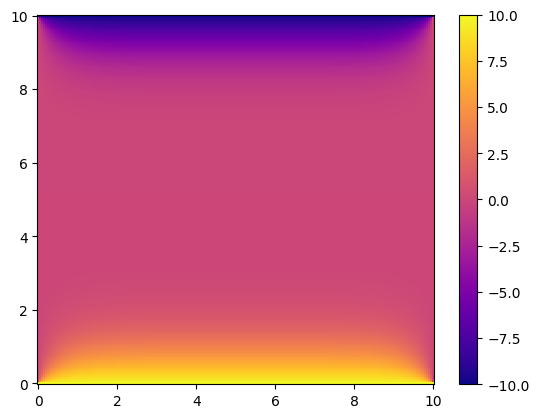

In [ ]:
X, Y = np.meshgrid(x, y)

plt.pcolormesh(X, Y, phi, cmap="plasma")
plt.colorbar()

**Resuelva la ecuación de Laplace y encuentre el potencial eléctrico entre placas y fuera de ellas:**

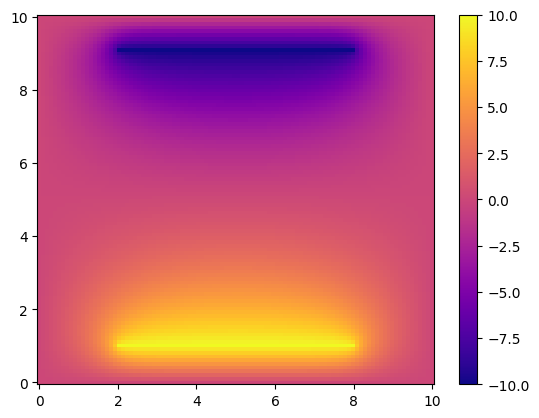

In [ ]:
#

**Calcule el campo eléctrico generado por las placas:**

Recuerde que existe una relación entre campo y potencial eléctrico:

$$ \vec{E} = -\vec{\nabla} \phi $$

Si ya conoce el potencial eléctrico $\phi$ puede obtener el campo eléctrico de la siguiente manera:

$$ \vec{E} = - \left(  \frac{\partial \phi}{\partial x}, \frac{\partial \phi}{\partial y} \right) $$

Esto significa que, cada componente del campo eléctrico corresponde a la deriva parcial de $\phi$, y las podemos aproximar numéricamente con el método `central difference`: 

$$ E_x = - \frac{\partial \phi}{\partial x} \approx - \frac{\phi(x+h, y) - \phi(x-h,y)}{2h}$$
$$ E_y = - \frac{\partial \phi}{\partial y} \approx - \frac{\phi(x, y+h) - \phi(x,y-h)}{2h}$$

In [ ]:
### determine el campo electrico

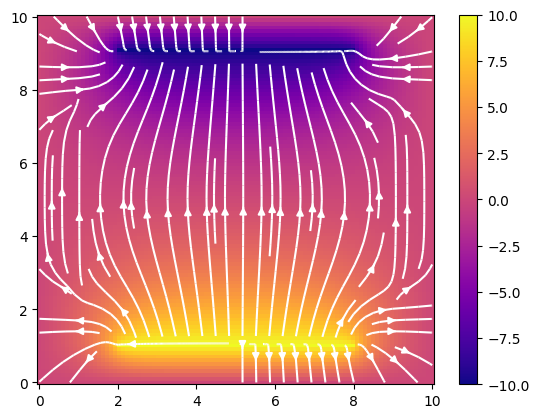

In [82]:
X, Y = np.meshgrid(x, y)

plt.pcolormesh(X, Y, phi, cmap="plasma")
plt.colorbar()

plt.streamplot(X,Y,Ex,Ey, color="white", density=1)

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Ecuación de Poisson**

La ecuación de Poisson describe el comportamiento del potencial gravitatorio $\Phi$ generado por una distribución de masa en un espacio tridimensional. Se expresa como:

$$
\nabla^2 \Phi = 4 \pi G \rho
$$

donde:

- $\Phi(x, y, z)$ representa el potencial gravitatorio en función de las coordenadas espaciales \( (x, y, z) \).
- $\rho(x, y, z)$ es la densidad de masa en el espacio, que puede variar dependiendo de la distribución de masa.
- $G$ es la constante de gravitación universal, que tiene un valor aproximado de $6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$.
- $\nabla^2$ es el operador Laplaciano, que se define en coordenadas cartesianas como:

$$
\nabla^2 \Phi = \frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2} + \frac{\partial^2 \Phi}{\partial z^2}
$$

Esta ecuación establece que el Laplaciano del potencial gravitatorio es proporcional a la densidad de masa. En otras palabras, donde hay una mayor concentración de masa, el potencial gravitatorio se comporta de manera diferente.

**Ejemplo de Aplicación**: Si consideramos una distribución de masa que representa una galaxia espiral, podemos utilizar la ecuación de Poisson para calcular el potencial gravitatorio en función de la densidad de masa de la galaxia. Este potencial puede luego ser usado para determinar el campo gravitatorio asociado, que influye en el movimiento de estrellas y otros objetos dentro de la galaxia.

</div>


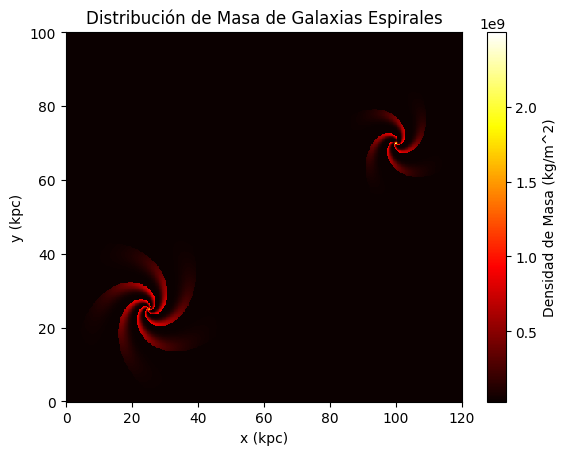

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del espacio
Nx, Ny = 500, 500  # Tamaño de la malla
Lx, Ly = 120.0, 100.0  # Dimensiones físicas del espacio
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
G = 6.67430e-11  # Constante de gravitación universal en m^3 kg^-1 s^-2

# Inicializar la densidad de masa
rho = np.zeros((Nx, Ny))

def generate_spiral_galaxy(
    rho,
    center_x,
    center_y,
    num_arms,
    arm_spread,
    density_peak,
    decay_rate,
    central_mass_peak,
    background_density,
):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Convertir a coordenadas polares centradas en el centro de la galaxia
    R = np.sqrt((X - center_x) ** 2 + (Y - center_y) ** 2)
    theta = np.arctan2(Y - center_y, X - center_x)

    # Añadir densidad de fondo
    rho += background_density * np.ones_like(R)  # Densidad de fondo constante

    # Crear la estructura de brazos espirales
    for arm in range(num_arms):
        arm_angle = 2 * np.pi * arm / num_arms
        spiral_theta = arm_angle + np.log(R + 1) * arm_spread

        # Agregar una distribución de masa gaussiana a lo largo de los brazos
        gaussian = (
            density_peak
            * np.exp(-decay_rate * R**2)
            * np.exp(-(((theta - spiral_theta) % (2 * np.pi)) ** 2) / (2 * 0.3**2))
        )
        rho += gaussian

    # Agregar masa al centro
    central_gaussian = central_mass_peak * np.exp(
        -(R**2) / (2 * (0.3**2))
    )  # Distribución gaussiana centrada
    rho += central_gaussian

    return rho, x, y

# Generar tres galaxias espirales
rho, x, y = generate_spiral_galaxy(
    rho,
    center_x=25,
    center_y=25,
    num_arms=5,
    arm_spread=1.5,
    density_peak=1e9,
    decay_rate=0.01,
    central_mass_peak=1.5e9,
    background_density=1e7,
)

# Generar tres galaxias espirales
rho, x, y = generate_spiral_galaxy(
    rho,
    center_x=100,
    center_y=70,
    num_arms=4,
    arm_spread=1.5,
    density_peak=1e9,
    decay_rate=0.02,
    central_mass_peak=1.6e9,
    background_density=2e7,
)

X, Y = np.meshgrid(x, y)

# Visualizar la distribución de masa
plt.pcolormesh(X, Y, rho, cmap="hot")
plt.colorbar(label="Densidad de Masa (kg/m^2)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Distribución de Masa de Galaxias Espirales")
plt.show()

#### Discretice la ecuación de Poisson de forma análoga a como discretizamos la ecuación de Laplace:


*Escriba la ecuación acá, edite la celda!*

Una vez discretizada, resolvamos la ecuación en Python:

In [ ]:
# Resolver ecuación de Poisson


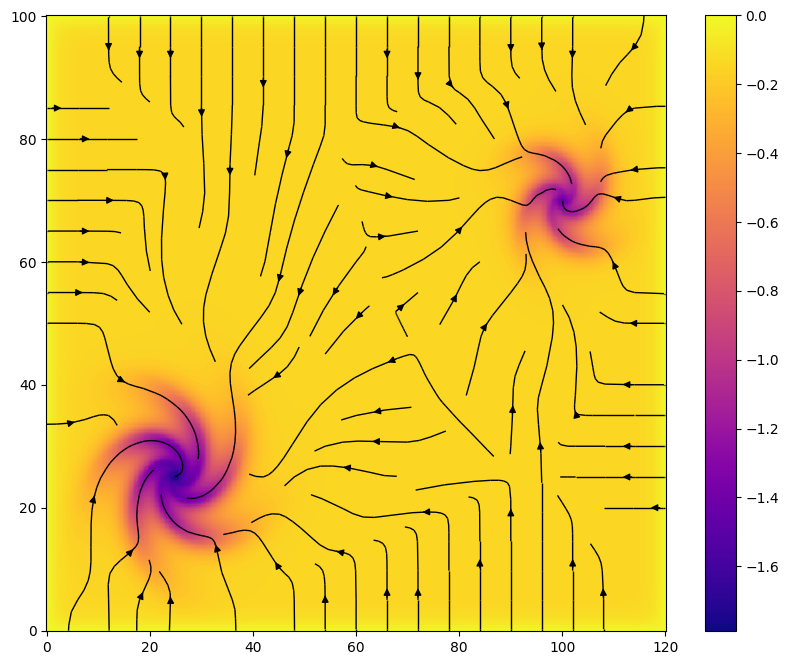

In [ ]:


#plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], Gx[::skip, ::skip], Gy[::skip, ::skip], G_mag[::skip, ::skip])

1.0123891451341989

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:**

En esta jornada, revisamos diferentes representaciones gráficas de campos escalares y vectoriales, y exploramos el significado del gradiente como una herramienta fundamental para entender cómo varían estos campos en el espacio. Posteriormente, abordamos la resolución de ecuaciones en derivadas parciales (EDP), comenzando con la ecuación de Laplace y su aplicación en el problema de potencial eléctrico entre placas paralelas utilizando el método de diferencias finitas. Luego, avanzamos hacia la ecuación de Poisson, aplicada a problemas de gravitación.

Como conclusión, en esta clase aprendimos a visualizar y resolver EDPs fundamentales que modelan fenómenos físicos importantes, aplicando técnicas numéricas que permiten obtener soluciones aproximadas en contextos donde no es posible obtener soluciones analíticas.

En la próxima clase, profundizaremos en la ecuación de calor y su resolución mediante métodos numéricos. Además, analizaremos el método de Von Neumann, que es crucial para estudiar la estabilidad de las soluciones numéricas en estos problemas.

</div>


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional IV para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>
